# SI 618 - Homework #1: Data Manipulation

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [283]:
MY_UNIQNAME = 'shruthis'

Also worked with Ivie Okieimen and Yasemin Karbassian

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  

** You should also feel free to ask questions on the class Slack channel!**

A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses.  (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## 0. Download the data from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
- https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities (note: we suggest you use the [read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function to load the data into a DataFrame.

## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### 5 pt: Describe the dataset. 
- How many number rows and columns do you see in each data frame? 
- Are there any other interesting descriptive details?

In [284]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
import numpy as np
#pd.read_html('http://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities#Olympic_Games_host_cities', match='.+', flavor=None, header=None, index_col=None, skiprows=None, attrs=None, parse_dates=False, tupleize_cols=None, thousands=', ', encoding=None, decimal='.', converters=None, na_values=None, keep_default_na=True, displayed_only=True)

list = pd.read_html('http://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities#Olympic_Games_host_cities', match='.+', flavor=None, header=None, index_col=None, skiprows=None, attrs=None, parse_dates=False, tupleize_cols=None, thousands=', ', encoding=None, decimal='.', converters=None, na_values=None, keep_default_na=True, displayed_only=True)
countries = list[1]
#countries
new_header = countries.iloc[0] #grab the first row for the header
countries = countries[1:] #take the data less the header row
countries.columns = new_header
countries


,City,Country,Continent,Summer (Olympiad),Winter,Summer (Youth),Winter (Youth),Year,Opening Ceremony,Closing Ceremony
1,Athens,Greece,Europe,NaN,NaN,NaN,NaN,1896,April 6,April 15
2,Paris,France,Europe,NaN,NaN,NaN,NaN,1900,May 14,October 28
3,St. Louis[a],United States,North America,NaN,NaN,NaN,NaN,1904,July 1,November 23
4,London[c],United Kingdom,Europe,NaN,NaN,NaN,NaN,1908,April 27,October 31
5,Stockholm,Sweden,Europe,NaN,NaN,NaN,NaN,1912,May 5,July 22
6,Berlin,Germany,Europe,NaN,NaN,NaN,NaN,1916,Cancelled due to WWI[10],NaN
7,Antwerp[d],Belgium,Europe,NaN,NaN,NaN,NaN,1920,April 20,September 12[11]
8,Chamonix,France,Europe,NaN,NaN,NaN,NaN,1924,January 25,February 5[12]
9,Paris,France,Europe,NaN,NaN,NaN,NaN,May 4,July 27[13],NaN
10,St. Moritz,Switzerland,Europe,NaN,NaN,NaN,NaN,1928,February 11,February 19[14]


In [285]:
#print(countries.columns)
print("The number of rows of the countries dataset is: ", len(countries))
print("The number of columns of the countries dataset is: ", len(countries.columns))
countries.describe()

The number of rows of the countries dataset is:  68
The number of columns of the countries dataset is:  10


,City,Country,Continent,Summer (Olympiad),Winter,Summer (Youth),Winter (Youth),Year,Opening Ceremony,Closing Ceremony
count,68,68,67,0.0,0.0,0.0,0.0,66,65,39
unique,53,33,10,0.0,0.0,0.0,0.0,65,52,33
top,Paris,United States,Europe,NaN,NaN,NaN,NaN,July 19,February 4,February 28
freq,3,9,35,NaN,NaN,NaN,NaN,2,3,3


From a statistics perspective, there were several characteristics that stood out. Overall, there appear to have been 68 unique Olympic events. The United States has been the most frequent host country (hosted 9 times), and Europe has been the most frequent "host continent" (hosted 35 times). Paris has also been the most frequent city, having hosted the Olympics 3 times. There also appear to have been fewer closing ceremonies than opening ceremonies.



In [286]:
athletes = pd.read_csv("data/athlete_events.csv")
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [287]:
athletes.shape

(271116, 15)

In [288]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


The athletes dataframe has 271116 rows and 15 columns. 

The average age of all athletes who have competed in the Olympics to date is 25.6 years. The average height of all athletes in the dataframe is 175.3 cm, and average weight is 70.7 kg. Interestingly, the oldest person to compete in the Olympics was 97.0 years old! The youngest person to compete was 10.


### 5 pt: What is the overall ratio of female to male atheletes? 
There are multiple ways one could determine the meaning of "overall" here, and there isn't necessarily one correct answer. Based on your interpretation, give a justification for the choices you made in your analysis.

In [289]:
males = athletes[athletes['Sex'] == 'M']
print(len(males.Name.unique()))


100979


In [290]:
females = athletes[athletes['Sex'] == 'F']
print(len(females.Name.unique()))


33808


In [291]:
print("The ratio of female to male athletes is: ", len(females.Name.unique())/len(males.Name.unique())) 


The ratio of female to male athletes is:  0.33480228562374353


As mentioned above, the athletes dataframe appears to include the same male or femal athlete's name multiple times if they participated in multiple Olympic events or over several years. With this calculation, I therefore filtered out athletes whose name appeared multiple times in the athletes_events.csv file. After first creating two subsets which filtered for sex (one for all male athletes and one for all female), I then filtered the counts of athletes for each sex by only including unique entries of each name. This yielded the values of 100979 male athletes and 33808 female athletes.

The ratio of 0.335 indicates that for every occurrence of a male athlete's name in the data frame, there are 0.335 female athletes names documented.

### 10 pt: Which athelete competed in most number of events? 
In which events did the athelete participate, and for what range of years? Which country did the athlete represent?

In [292]:
athletes_sorted = athletes['Name'].value_counts().head()
#athletes_sorted.tail()
athletes_sorted


Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Name: Name, dtype: int64

In [293]:
most_athletes = athletes.Name=='Robert Tait McKenzie'
athletes[most_athletes].head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
154798,77710,Robert Tait McKenzie,M,44.0,NaN,NaN,Canada,CAN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN
154799,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154800,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154801,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154802,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [294]:
athletes[most_athletes].Event.unique()


array(['Art Competitions Mixed Sculpturing',
       'Art Competitions Mixed Sculpturing, Statues',
       'Art Competitions Mixed Sculpturing, Medals And Reliefs',
       'Art Competitions Mixed Sculpturing, Unknown Event',
       'Art Competitions Mixed Sculpturing, Medals'], dtype=object)

In [295]:
#athletes[most_athletes].sort_values('Year')
years = athletes[most_athletes].Year.unique()
print(years[0], years[-1])

1912 1948


In [296]:
country = athletes[most_athletes].Team.unique()
country

array(['Canada'], dtype=object)

The athlete who competed in the most number of events was Robert Tait McKenzie, representing Canada. He competed in 5 events from 1912--1948: 
- Art Competitions Mixed Sculpturing
- Art Competitions Mixed Sculpturing, Statues
- Art Competitions Mixed Sculpturing, Medals And Reliefs
- Art Competitions Mixed Sculpturing, Unknown Event
- Art Competitions Mixed Sculpturing, Medals

### 10 pt: Which sport has the highest median athlete age? 
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

In [297]:
median_ages = athletes.groupby(['Sport'])['Age'].median().sort_values(ascending=False).head(10)
median_ages


Sport
Roque               59.0
Art Competitions    45.0
Alpinism            38.0
Polo                35.0
Shooting            33.0
Equestrianism       33.0
Croquet             33.0
Jeu De Paume        31.0
Motorboating        31.0
Curling             30.0
Name: Age, dtype: float64

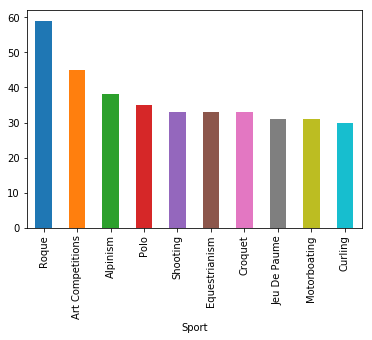

In [298]:
median_ages.plot.bar()

The sport Roque had the highest median athlete age of 59.0 years.

### 10 pt: In which events has Jamaica won the most medals?

In [299]:
medals = athletes[(athletes.Team=='Jamaica') & ((athletes.Medal == 'Bronze') | (athletes.Medal == 'Silver') | (athletes.Medal == 'Gold'))]
medals.Event.value_counts()



Athletics Women's 4 x 100 metres Relay    28
Athletics Men's 4 x 400 metres Relay      27
Athletics Women's 4 x 400 metres Relay    27
Athletics Men's 4 x 100 metres Relay      16
Athletics Women's 100 metres              13
Athletics Women's 200 metres              12
Athletics Men's 100 metres                 8
Athletics Men's 200 metres                 7
Athletics Men's 400 metres                 5
Athletics Women's 400 metres Hurdles       3
Athletics Women's 400 metres               3
Athletics Men's 400 metres Hurdles         2
Athletics Men's 800 metres                 2
Athletics Men's 110 metres Hurdles         2
Athletics Men's Long Jump                  1
Cycling Men's 1,000 metres Time Trial      1
Name: Event, dtype: int64

Jamaica has won the most medals in the Athletics Women's 4 x 100 metres Relay (28 medals) and the Athletics Men's 4 x 100 metres Relay (27 medals).

### 10 pt: Which countries have more female medalists than male medalists?

In [300]:
medals = ['Bronze', 'Silver', 'Gold']
f_medalists = athletes[athletes['Medal'].isin(medals) & (athletes.Sex=='F')]
f_medal_counts = f_medalists.groupby(['NOC'])['Medal'].count()
f_medal_counts

m_medalists = athletes[athletes['Medal'].isin(medals) & (athletes.Sex=='M')]
m_medal_counts = m_medalists.groupby(['NOC'])['Medal'].count()
m_medal_counts

comparison = {}
for team in f_medal_counts.keys():
    if team in m_medal_counts.keys():
        comparison[team] = f_medal_counts[team]-m_medal_counts[team]
comparison
fm_medalists = pd.DataFrame.from_dict(comparison, orient='index')
fm_medalists.columns = ['Count']
fm_medalists.sort_values('Count', ascending=False).head(10)



,Count
CHN,319
ROU,57
BLR,15
JAM,15
UKR,11
PER,9
SGP,5
LIE,1
PRK,1
SRI,0


The countries China, Romania, Jamaica, Belarus, Ukraine, Peru, Singapore, Liechtenstein, and North Korea all had more female medalists than male medalists. China had the largest difference, with 299 more female than male medalists.

### 10 pt: Which country won the most medal points in each of the 2014 Winter Olympics?
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [301]:
olympics_2014 = athletes[(athletes.Season == "Winter") & (athletes.Year == 2014) & (athletes['Medal'].isin(medals))]
olympics_2014.groupby(['NOC'])['Medal'].size()

medals_dict = olympics_2014.to_dict('index')
country_dict = {}

for item in medals_dict:
    if medals_dict[item]['NOC'] not in country_dict:
        noc = medals_dict[item]['NOC']
        if medals_dict[item]['Medal'] == 'Bronze':
            country_dict[noc] = 1
        if medals_dict[item]['Medal'] == 'Silver':
            country_dict[noc] = 2
        if medals_dict[item]['Medal'] == 'Gold':
            country_dict[noc] = 3
    else:
        noc = medals_dict[item]['NOC']
        if medals_dict[item]['Medal'] == 'Bronze':
            country_dict[noc] += 1
        if medals_dict[item]['Medal'] == 'Silver':
            country_dict[noc] += 2
        if medals_dict[item]['Medal'] == 'Gold':
            country_dict[noc] += 3
# country_dict

country_medals = pd.DataFrame.from_dict(country_dict, orient='index')
country_medals.columns = ['Medal Points']
country_medals.sort_values('Medal Points', ascending=False).head(10)




,Medal Points
CAN,226
RUS,156
USA,114
SWE,99
GER,78
NOR,77
NED,62
AUT,47
SUI,46
FIN,44


Canada won the most medal points in the Winter 2014 Olympics. 

### 20 pt: For each year in which games were held, what proportion of gold medals did the host country win? 
You will need to combine multiple datasets to complete the analysis.  

In [397]:
# summer_list = pd.read_html('http://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities#Olympic_Games_host_cities', match='.+', flavor=None, header=None, index_col=None, skiprows=None, attrs=None, parse_dates=False, tupleize_cols=None, thousands=', ', encoding=None, decimal='.', converters=None, na_values=None, keep_default_na=True, displayed_only=True)
# summer_oly = summer_list[1]
# summer_oly
# new_columns = summer_oly.iloc[0]
# summer_oly = summer_oly[1:]
# summer_oly.columns = new_columns
# summer_oly

# regions = pd.read_csv("data/noc_regions.csv")
# regions.head()


# https://en.wikipedia.org/wiki/Summer_Olympic_Games#List_of_Summer_Olympic_Games


# gold_medals = athletes[athletes['Medal'] == 'Gold']

# host_countries = countries[['Country','Year']]

combined = pd.merge(countries, athletes, on='City')
combined
combined_gold = combined[combined['Medal'] == 'Gold']
combined_gold
zoom_gold = combined_gold[['Country', 'Team', 'Year_x', 'Medal']]
# zoom_gold

host_gold = zoom_gold[(zoom_gold.Country == zoom_gold.Team)]
host_gold_group = host_gold.groupby(['Year_x', 'Country']).size()
host_gold_df = host_gold_group.to_frame()

print('Total gold medal counts per year for each host country:')
host_gold_df

host_gold_dict = host_gold_df.to_dict('dict')
host_gold_dict = host_gold_dict[0]# key = year,country    value = count of host medals
host_count = len(host_gold_dict)
host_count
host_gold_dict

# df["normalized-losses"]=df["normalized-losses"].astype(int)

# host_gold_df['Year_x'] = host_gold_df['Year_x'].astype(int)


## df['purchase'].astype(str).astype(int)

## zoom_gold.groupby(['Year_x']).size()

# #combined['Count'] = (combined['Medal'] == 'Gold').astype(int)
# #combined['Host'] = (combined['Country'] == combined['Team']).astype(int)
# #combined
# # combined[combined['Year_x'=='Year_y']]

# gold_medals = athletes[athletes['Medal'] == 'Gold']
# total_gold = gold_medals.groupby(['Year']).size()
# total_gold_df = total_gold.to_frame()
# total_gold_df
# total_gold_dict = total_gold_df.to_dict('index')
# total_gold_dict

# # host_count
# f_host_gold_dict = host_gold_dict[0]
# f_host_gold_dict

# for i in range(host_count):
#     print(host_gold_dict[0])



# total_gold_df['Year'].astype(str).astype(int)

# host_gold_df.join(total_gold_df)

# pd.concat([host_gold_df, total_gold_df])
# host_gold_df.merge(total_gold_df, left_on='Year_x', right_on='Year', how='outer')

# gold_combined = pd.merge(host_gold_df, total_gold_df, on 'Year')

# combined.loc[combined['Medal'] == 'Gold','Count'].sum()

# matched = combined[combined.Year_x == combined.Year_y]
# matched

# combined.groupby(['Year_x'=='Year_y'])['Count'].sum()

# combined.groupby(['Host'] == 1)['Count'].sum()
# combined.loc[combined['Medal'] == 'Gold', 'Count'].sum()

# df['total'] = df[['A','B']].sum(axis=1).where(df['A'] > 0, 0)
# df
# combined['Host']

# combined.groupby(['Year_x'])['Count'].sum()


# # country_gold_medals = gold_medals.groupby(['NOC','Year'])['Medal'].count()

# host_dict = host_countries.to_dict('records')
# host_dict # a list of dictionaries
# num_countries = len(host_dict)
# for i in range(num_countries):
#     if len(str(host_dict[i]['Year'])) != 4:
#         host_dict[i]['Year'] = host_dict[(i-1)]['Year']

# country_noc = athletes[['Team', 'NOC']]
# country_dict_raw = country_noc.to_dict('index')
# num_all = len(country_dict_raw)

# country_dict = {}
# for i in range(num_all):
#     if country_dict_raw[i]['Team'] not in country_dict:
#         country_dict[country_dict_raw[i]['Team']] = country_dict_raw[i]['NOC']
# #         if country_dict_raw[i]['Team'] == ''
#     else:
#         pass
# country_dict

# countries_list = country_dict.keys()
# countries_list
# country_gold_medals = gold_medals.groupby(['NOC','Year'])['Medal'].count()
# country_gold_medals

# num_countries
# for i in range(num_countries):
#     country_name = host_dict[i]['Country']
#     print(country_name)
#     if country_name == 'United Kingdom':
#         country_name = 'Great Britain'
#     year = int(host_dict[i]['Year'])
#     for country in countries_list:
#         if country_name == country:
#             noc = {'NOC': country_dict[country]}
#             host_dict[i].update(noc)
#             host_noc = host_dict[i]['NOC']
# #             print(host_noc)
# #             print(country_gold_medals[host_noc][year])
#             medal_count = {'Host': country_gold_medals[host_noc][year]}
#             host_dict[i].update(medal_count)
# host_dict
# country_gold_medals['USA']

# for i in range(num_countries):
#     noc = host_dict[i]['NOC']
#     year = int(host_dict[i]['Year'])
#     print(noc)
#     print(year)
#     country_gold_medals[noc][year]
#     medal_count = {'Host_Gold': int(country_gold_medals[noc][year])}
#     host_dict[i].update(medal_count)

# host_dict

# # country_gold_medals = gold_medals.groupby(['NOC','Year'])['Medal'].count()
# # country_gold_medals['ALG'][1992]

    

# males = athletes[athletes['Sex'] == 'M']
# gold_medals = gold_df.pivot_table(index='NOC', columns='Year', values = 'Medal', aggfunc='count')
# gold_medals


# dataframe for gold medals for all countries
# add dictionary entry with gold medal count per country/year to host_dict list
# add dictionary entry with gold medal count per year to host_dict list
# add dictionary entry with gold medal proportion to host_dict list



Total gold medal counts per year for each host country:


{('1900', 'France'): 59,
 ('1912', 'Sweden'): 100,
 ('1916', 'Germany'): 91,
 ('1932', 'United States'): 28,
 ('1952', 'Norway'): 7,
 ('1960', 'United States'): 19,
 ('1964', 'Austria'): 5,
 ('1968', 'France'): 4,
 ('1972', 'Japan'): 1,
 ('1976', 'Austria'): 5,
 ('1980', 'United States'): 28,
 ('1992', 'France'): 5,
 ('1994', 'Norway'): 8,
 ('1996', 'United States'): 157,
 ('1998', 'Japan'): 8,
 ('2000', 'Australia'): 58,
 ('2002', 'United States'): 9,
 ('2010', 'Canada'): 63,
 ('2012', 'Austria'): 5,
 ('2014', 'Russia'): 25,
 ('2016', 'Norway'): 8,
 ('2022', 'China'): 72,
 ('2024', 'France'): 59,
 ('2028', 'United States'): 253,
 ('August 26', 'West Germany'): 44,
 ('August 5', 'Brazil'): 34,
 ('July 19', 'Finland'): 8,
 ('July 24', 'Japan'): 32,
 ('July 25', 'Spain'): 48,
 ('July 28', 'United States'): 253,
 ('July 30', 'United States'): 253,
 ('May 17', 'Netherlands'): 20,
 ('May 4', 'France'): 59,
 ('October 10', 'Japan'): 32,
 ('October 12', 'Mexico'): 3,
 ('September 17', 'South 

In [398]:

gold_medals = athletes[athletes['Medal'] == 'Gold']
total_gold = gold_medals.groupby(['Year']).size()
total_gold_df = total_gold.to_frame()
print("Total Gold medal counts per year:")
total_gold_df

total_gold_dict = total_gold_df.to_dict('index')
total_gold_dict

Total Gold medal counts per year:


{1896: {0: 62},
 1900: {0: 201},
 1904: {0: 173},
 1906: {0: 157},
 1908: {0: 294},
 1912: {0: 326},
 1920: {0: 493},
 1924: {0: 332},
 1928: {0: 275},
 1932: {0: 261},
 1936: {0: 348},
 1948: {0: 330},
 1952: {0: 351},
 1956: {0: 353},
 1960: {0: 359},
 1964: {0: 408},
 1968: {0: 425},
 1972: {0: 474},
 1976: {0: 508},
 1980: {0: 529},
 1984: {0: 571},
 1988: {0: 607},
 1992: {0: 663},
 1994: {0: 110},
 1996: {0: 608},
 1998: {0: 145},
 2000: {0: 663},
 2002: {0: 162},
 2004: {0: 664},
 2006: {0: 176},
 2008: {0: 671},
 2010: {0: 174},
 2012: {0: 632},
 2014: {0: 202},
 2016: {0: 665}}

(Use this space to explain your answers)

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas